# matplotlib

Mächtiges Modul, das viele Möglichkeiten zum Plotten bereitstellt.

**Hinweis für Nutzer der Spyder-IDE**: Schreibt man seine Programme stets in einem Pythonskript statt in einem Jupyter Notebook, sollte für Grafikoutput das QT5-Backend ausgewählt werden:

Werkzeuge -> Voreinstellungen -> (links) IPython-Konsole -> Grafik

Damit wird für jede Grafik ein eigenes Fenster geöffnet, in welchem man interaktiv zoomen kann. Also völlig analog zu MATLAB.

**Zusätzlich sollte bei Plots explizit die `.show()`-Methode für das entsprechende Grafikfenster aufgerufen werden, um Kompatibilität außerhalb von IPython und Jupyter Notebooks zu garantieren!**



In [1]:
# Achtung, das hier kann ignoriert werden!
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
# Sollte immer so importiert werden
import matplotlib.pyplot as plt

Wir plotten als erstes Beispiel die Sinusfunktion:

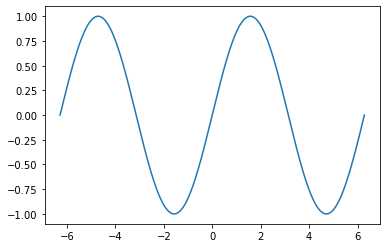

In [3]:
# Einfacher Plot
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
plt.plot(x,np.sin(x))
plt.show()             

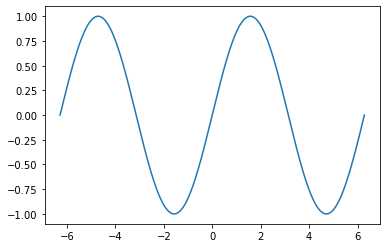

In [4]:
# Jetzt eleganter:
fig1, ax = plt.subplots(1,1)
ax.plot(x, np.sin(x))
fig1.show()

## Höhenlinienplots

Wir plotten als Beispiel die Höhenlinien der Funktion $f(x,y)=sin(x)\cdot cos(y)$, d.h. wir plotten $f(x,y)=c$ für verschiedene Werte von $c$.

In [5]:
# zwei verschiedene Möglichkeiten:
f1 = lambda x: np.sin(x[0])*np.sin(x[1])
f2 = lambda x, y: np.sin(x)*np.sin(y)    

In [6]:
x = np.linspace(-2*np.pi,2*np.pi, 500)
y = np.linspace(-2*np.pi,2*np.pi, 500)

In [7]:
# Achtung, X und Y sind jetzt Matrizen
X, Y = np.meshgrid(x,y)

Um die Höhenlinien zu plotten, müssen wir $f$ jetzt für jedes $x$ aus der Matrix $X$ und für jedes $y$ aus der $Y$-Matrix auswerten, so dass wir eine Matrix der Funktionswerte erhalten:

In [8]:
# Funktioniert für f1 so nicht:
f1(X,Y)

TypeError: <lambda>() takes 1 positional argument but 2 were given

In [9]:
# Für f2 dagegen schon:
f2(X,Y)

array([[ 5.99903913e-32,  6.16743045e-18,  1.23309498e-17, ...,
        -1.23309498e-17, -6.16743045e-18, -5.99903913e-32],
       [ 6.16743045e-18,  6.34054847e-04,  1.26770760e-03, ...,
        -1.26770760e-03, -6.34054847e-04, -6.16743045e-18],
       [ 1.23309498e-17,  1.26770760e-03,  2.53461128e-03, ...,
        -2.53461128e-03, -1.26770760e-03, -1.23309498e-17],
       ...,
       [-1.23309498e-17, -1.26770760e-03, -2.53461128e-03, ...,
         2.53461128e-03,  1.26770760e-03,  1.23309498e-17],
       [-6.16743045e-18, -6.34054847e-04, -1.26770760e-03, ...,
         1.26770760e-03,  6.34054847e-04,  6.16743045e-18],
       [-5.99903913e-32, -6.16743045e-18, -1.23309498e-17, ...,
         1.23309498e-17,  6.16743045e-18,  5.99903913e-32]])

In [10]:
# Wichtig: f1 erwartet nur ein Argument bei unserer Definition!
# Übergebe einfach ein Array aus den beiden Matrizen:
f1(np.array([X,Y]))

array([[ 5.99903913e-32,  6.16743045e-18,  1.23309498e-17, ...,
        -1.23309498e-17, -6.16743045e-18, -5.99903913e-32],
       [ 6.16743045e-18,  6.34054847e-04,  1.26770760e-03, ...,
        -1.26770760e-03, -6.34054847e-04, -6.16743045e-18],
       [ 1.23309498e-17,  1.26770760e-03,  2.53461128e-03, ...,
        -2.53461128e-03, -1.26770760e-03, -1.23309498e-17],
       ...,
       [-1.23309498e-17, -1.26770760e-03, -2.53461128e-03, ...,
         2.53461128e-03,  1.26770760e-03,  1.23309498e-17],
       [-6.16743045e-18, -6.34054847e-04, -1.26770760e-03, ...,
         1.26770760e-03,  6.34054847e-04,  6.16743045e-18],
       [-5.99903913e-32, -6.16743045e-18, -1.23309498e-17, ...,
         1.23309498e-17,  6.16743045e-18,  5.99903913e-32]])

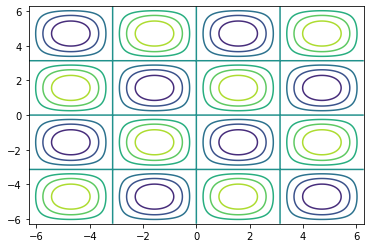

In [11]:
# Jetzt können wir plotten:
# Höhenlinien werden automatisch gewählt:
plt.contour(X, Y, f1(np.array([X,Y])), cmap="viridis")
plt.show()

## Mehrere Plots

Grundsätzlich sollte bei Programmen, die mehrere Grafikfenster zeigen (alle 2d/alle 3d), wie folgt vorgegangen werden:

- mit `fig, ax = plt.subplots(n, m)` ein Fensterobjekt mit $n \times m$ Gitter und direkt die entsprechenden Subplots ax erzeugen
- Anschließend kann für $n \cdot m > 1$ mit `ax[k].plot()`, `ax[k].contour()` usw. in den $k$-ten Subplot gezeichnet werden. 

- Bei $n = m = 1$ entsprechend mit `ax.plot()`, `ax.contour()` usw.

- Mit `fig.show()` wird explizit das entsprechende Fenster geöffnet. So lassen sich mehrere Fenster einzeln steuern.

- Mit `plt.show()` werden stets alle erzeugten Fenster gleichzeitig geöffnet.

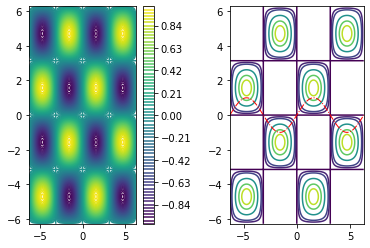

In [12]:
fig1, ax = plt.subplots(1, 2) # 1 Zeile, 2 Plots nebeneinander
# Anzahl der verschiedenen Höhenlinien vorgegeben,
# die Werte der Höhenlinien selbst werden jedoch
# automatisch gewählt:
img0 = ax[0].contour(X, Y, f1(np.array([X, Y])), cmap="viridis", levels=70)
plt.colorbar(img0, ax=ax[0])
# Nun explizite Vorgabe der Höhenlinienwerte:
ax[1].contour(X, Y, f1(np.array([X, Y])), cmap="viridis", levels=[0, 0.1, 0.2, 0.5, 0.75, 0.9, 1])
ax[1].plot(x, np.sin(x), color="red", linestyle = "-.", linewidth=1)
# Größerer vertikaler Abstand zwischen den beiden Subplots:
plt.subplots_adjust(wspace=0.5)
# Zeige das Grafikfenster:
fig1.show()

Die beiden Optionen `color` und `linestyle` kann man auch in einem einzelnen String zusammenfassen:

- `'r-'` entspricht  `color='red', linestyle='-'`
- `'b--'` entspricht `color='blue', linestyle='--'`
- `'g-.'` entspricht `color='green', linestyle='-.'`
- `'r:'` entspricht  `color='red', linestyle=':'`

Der äquivalente Aufruf wäre dann:

`ax[1].plot(x, np.sin(x), "r--", linewidth=1)`


Eine Übersicht er bereits definierten Farben gibt es [hier](https://matplotlib.org/3.1.3/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py).

## 3D-Plots

Für 3D-Plots muss der `plt.subplots(m,n)` Methode noch explizit die Option `projection="3d"` als `dict` übergeben werden. Damit diese Funktioniert, ist noch ein `import` notwendig:

In [13]:
from mpl_toolkits.mplot3d import Axes3D # nötig für 3D-Plots

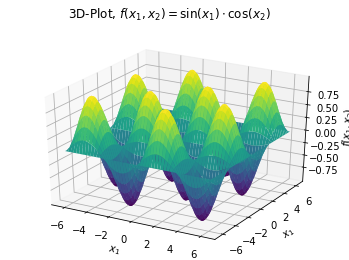

In [14]:
fig5, ax8 = plt.subplots(1,1, subplot_kw={'projection': '3d'})
ax8.plot_surface(X, Y, f1(np.array([X, Y])), cmap="viridis")
fig5.suptitle("3D-Plot, $f(x_1,x_2)=\sin(x_1)\cdot\cos(x_2)$", fontsize=12)
ax8.set_xlabel("$x_1$")
ax8.set_ylabel("$x_1$")
ax8.set_zlabel("$f(x_1,x_2)$")
fig5.show()

Natürlich gehen auch mehrere 3D plots nebeneinander:


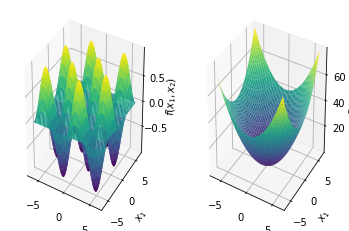

In [15]:
fig6, ax9 = plt.subplots(1,2, subplot_kw={'projection': '3d'})
ax9[0].plot_surface(X, Y, f1(np.array([X, Y])), cmap="viridis")
ax9[0].set_xlabel("$x_1$")
ax9[0].set_ylabel("$x_1$")
ax9[0].set_zlabel("$f(x_1,x_2)$")
ax9[1].plot_surface(X, Y, X**2+Y**2, cmap="viridis")
ax9[1].set_xlabel("$x_1$")
ax9[1].set_ylabel("$x_1$")
ax9[1].set_zlabel("$f(x_1,x_2)$")
fig5.show()

Möchte man z.B. einen 3D-Plot neben einem gewöhnlichem 2D-Plot
innerhalb eines figureobjekts haben, kann man wie folgt vorgehen:

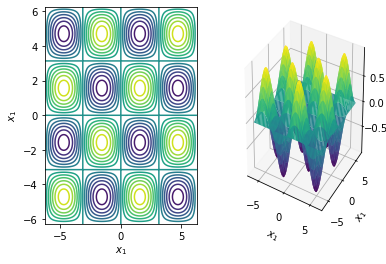

In [16]:
fig6 = plt.figure()
ax9 = fig6.add_subplot(121)
ax9.contour(X, Y, f1(np.array([X, Y])), levels = 15, cmap="viridis")
ax9.set_xlabel("$x_1$")
ax9.set_ylabel("$x_1$")
ax10 = fig6.add_subplot(122, projection='3d')
ax10.plot_surface(X, Y, f1(np.array([X, Y])), cmap="viridis")
ax10.set_xlabel("$x_1$")
ax10.set_ylabel("$x_1$")
ax10.set_zlabel("$f(x_1,x_2)$")
fig6.show()

In [18]:
# Grafik abspeichern. Wird dann in das selbe Verzeichnis gespeichert,
# in dem das Skript bzw. das Notebook liegt.
fig6.savefig("grafik.png", dpi = 300)

## Noch mehr?

In der [Matplotlib Gallery](https://matplotlib.org/3.1.1/gallery/index.html) gibt es zahlreiche Beispiele für verschiedene Plots und auch ein Blick in die [Tutorials](https://matplotlib.org/3.1.1/tutorials/index.html) lohnt sich.